In [2]:
import yfinance as yf
import numpy as np
from LSTM import MyLSTM
# Pobranie danych
df = yf.download('ETH-USD', start='2019-01-01', end='2021-12-31')
data = df[['Close']].values

# Utworzenie modelu MyGRU
gru_model = MyLSTM()
gru_model.create_model()
gru_model.fit(data)

# Pobranie danych testowych
test_data = yf.download('ETH-USD', start='2022-01-01', end='2022-03-31')
actual_prices = test_data[['Close']].values
length = len(actual_prices)

[*********************100%***********************]  1 of 1 completed
C:\Users\Michał\Desktop\crypto\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,371 (1.95 MB)

 Trainable params: 512,371 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0047 - val_loss: 0.0328
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 7.0966e-04 - val_loss: 0.0222
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 1.8989e-04 - val_loss: 0.0059
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 2.1603e-04 - val_loss: 0.0073
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 1.7528e-04 - val_loss: 0.0056


[*********************100%***********************]  1 of 1 completed


In [3]:
total_dataset = np.concatenate((data, actual_prices), axis=0)

# Prognozowanie
predicted_prices = gru_model.predict(total_dataset, length)
print(predicted_prices)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
[[4003.5671]
 [3989.8315]
 [3972.8413]
 [3953.8337]
 [3934.43  ]
 [3912.8074]
 [3886.7808]
 [3853.105 ]
 [3809.976 ]
 [3758.9062]
 [3701.49  ]
 [3642.2034]
 [3586.4473]
 [3536.0996]
 [3493.0508]
 [3458.3433]
 [3432.2952]
 [3412.571 ]
 [3396.6768]
 [3382.0364]
 [3366.0007]
 [3341.6184]
 [3304.156 ]
 [3254.6677]
 [3194.676 ]
 [3127.368 ]
 [3056.558 ]
 [2985.2332]
 [2917.8215]
 [2858.0337]
 [2808.006 ]
 [2769.624 ]
 [2744.517 ]
 [2730.8735]
 [2726.358 ]
 [2732.7463]
 [2750.1516]
 [2777.6633]
 [2814.3008]
 [2857.6099]
 [2906.3352]
 [2956.25  ]
 [3002.0688]
 [3040.5005]
 [3069.6116]
 [3089.7415]
 [3105.2375]
 [3118.3088]
 [3127.0303]
 [3129.3416]
 [3124.4468]
 [3110.9963]
 [3088.6636]
 [3059.4954]
 [3025.2483]
 [2988.1099]
 [2952.4429]
 [2921.3281]
 [2894.2407]
 [2874.7437]
 [2864.9944]
 [2864.8828]
 [2871.572 ]
 [2879.5112]
 [2885.8547]
 [2887.6172]
 [2882.8667]
 [2872.452 ]
 [2859.8347]
 [2845.8584]
 [2830.6892]
 [2814.9512]
 [2798.512 ]
 [2782.5674]

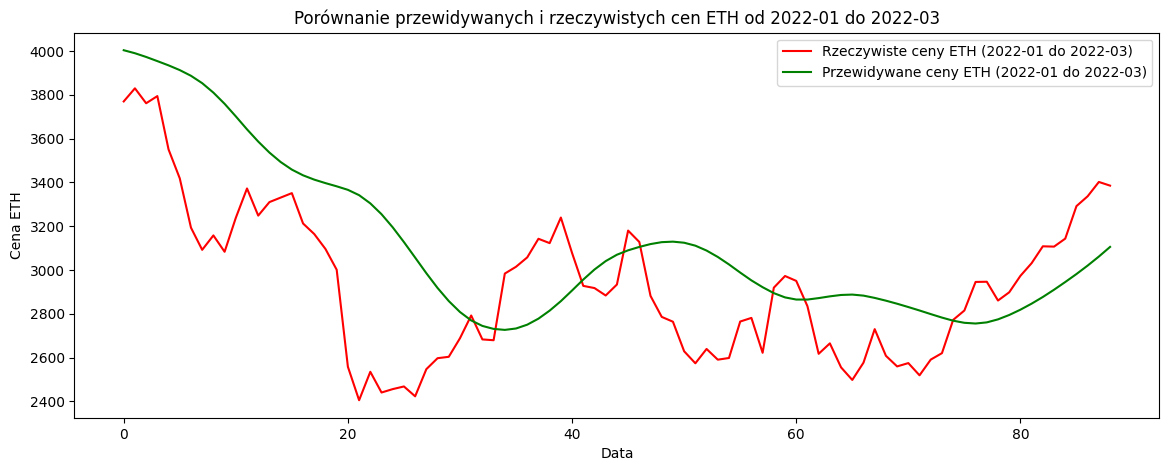

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(actual_prices, color='red', label='Rzeczywiste ceny ETH (2022-01 do 2022-03)')
plt.plot(predicted_prices, color='green', label='Przewidywane ceny ETH (2022-01 do 2022-03)')
plt.title('Porównanie przewidywanych i rzeczywistych cen ETH od 2022-01 do 2022-03')
plt.xlabel('Data')
plt.ylabel('Cena ETH')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Test RMSE: 3532.026


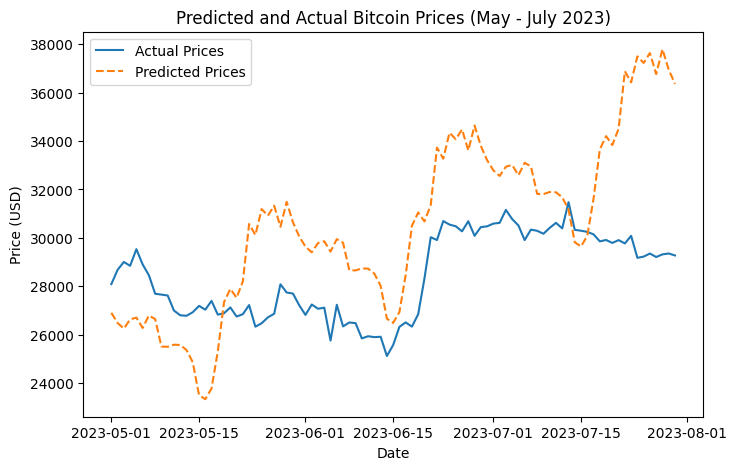

[*********************100%***********************]  1 of 1 completed


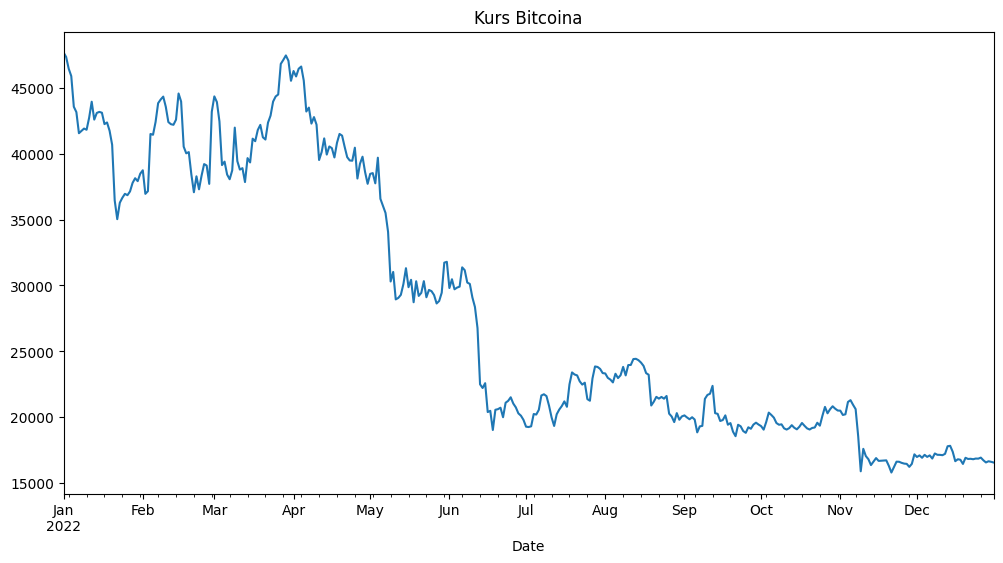

C:\Users\Michał\Desktop\crypto_predict\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Michał\Desktop\crypto_predict\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


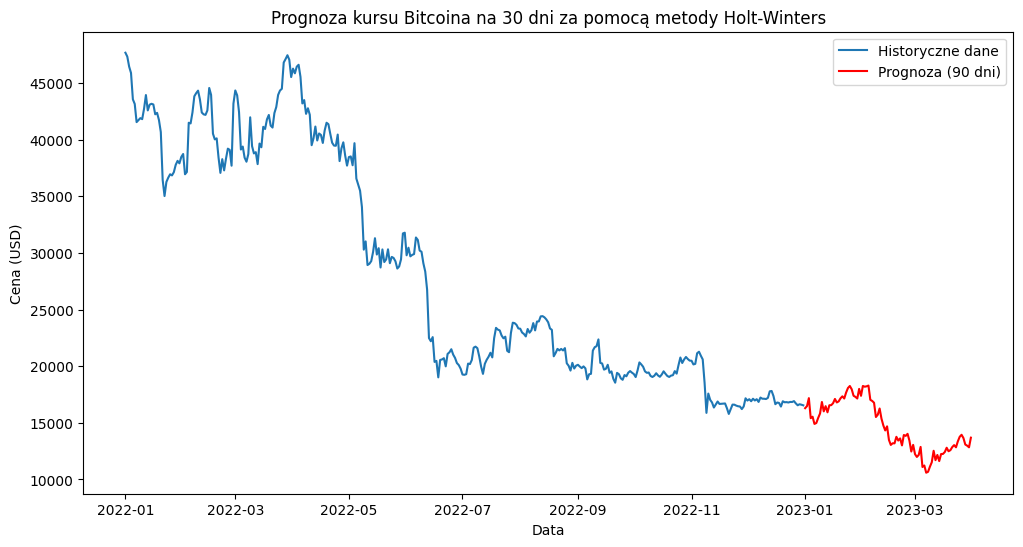

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Pobierz dane dla Bitcoina (lub innej kryptowaluty) za pomocą yfinance
crypto_symbol = 'BTC-USD'  # Symbol dla Bitcoina
data = yf.download(crypto_symbol, start='2022-01-01', end='2023-01-01', interval='1d')

# Wybierz tylko kolumnę 'Close' dla analiz
data = data[['Close']].dropna()
data.columns = ['Price']

# Wyświetl dane, aby upewnić się, że są poprawne
data['Price'].plot(title='Kurs Bitcoina', figsize=(12, 6))
plt.show()

# Krok 3: Dopasowanie modelu Holt-Winters
model = ExponentialSmoothing(data['Price'], 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=60)  # Sezonowość miesięczna (dla kursów dziennych)
hw_model = model.fit()

# Krok 4: Prognozowanie
forecast_period = 90  # Liczba dni do przodu do prognozowania
forecast = hw_model.forecast(steps=forecast_period)

# Krok 5: Wyświetlenie wyników na wykresie
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historyczne dane')
plt.plot(forecast, label=f'Prognoza ({forecast_period} dni)', color='red')
plt.legend()
plt.title('Prognoza kursu Bitcoina na 30 dni za pomocą metody Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Cena (USD)')
plt.show()


[*********************100%***********************]  1 of 1 completed


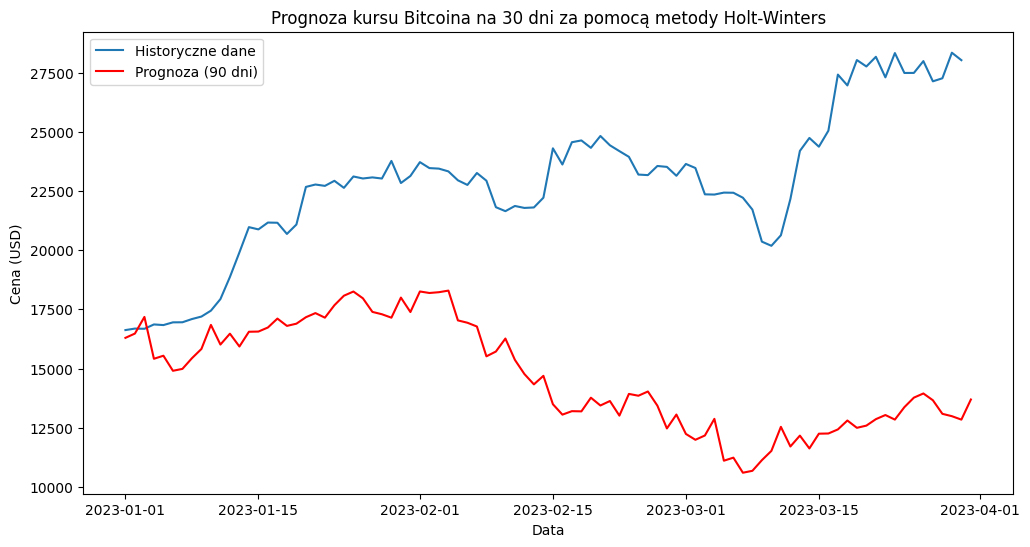

In [8]:
crypto_symbol = 'BTC-USD'  # Symbol dla Bitcoina
data = yf.download(crypto_symbol, start='2023-01-01', end='2023-03-31', interval='1d')


plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Historyczne dane')
plt.plot(forecast, label=f'Prognoza ({forecast_period} dni)', color='red')
plt.legend()
plt.title('Prognoza kursu Bitcoina na 30 dni za pomocą metody Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Cena (USD)')
plt.show()

[*********************100%***********************]  1 of 1 completed
C:\Users\Michał\Desktop\crypto\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Michał\Desktop\crypto\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -2542.394
Date:                            Wed, 13 Nov 2024   AIC                           5094.788
Time:                                    16:22:15   BIC                           5113.340
Sample:                                01-01-2022   HQIC                          5102.211
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0597      0.236      0.252      0.801      -0.404       0.523
ma.L1         -0.0815      0.236   

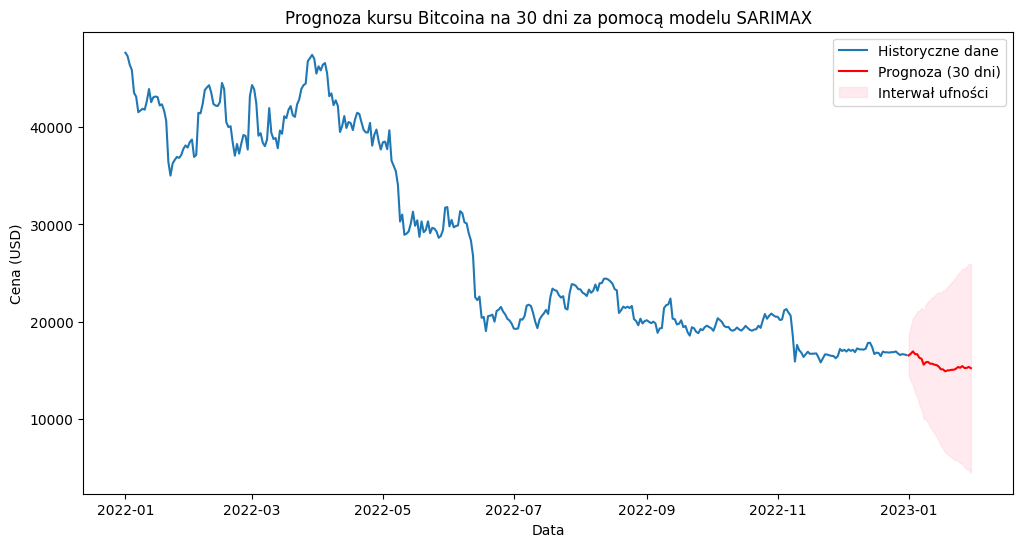

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Pobranie danych z yfinance
crypto_symbol = 'BTC-USD'
data = yf.download(crypto_symbol, start='2022-01-01', end='2023-01-01', interval='1d')
data = data[['Close']].dropna()
data.columns = ['Price']


# Definicja modelu SARIMAX
model = SARIMAX(data['Price'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 30),
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Dopasowanie modelu do danych
sarimax_model = model.fit(disp=False)

# Wyświetlenie podsumowania modelu
print(sarimax_model.summary())
# Prognozowanie 30 dni do przodu
forecast_period = 30
forecast = sarimax_model.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_period, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Interwały ufności prognozy
confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals['lower Price']
upper_limits = confidence_intervals['upper Price']

# Wizualizacja prognozy
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historyczne dane')
plt.plot(forecast_series, label='Prognoza (30 dni)', color='red')
plt.fill_between(forecast_index, lower_limits, upper_limits, color='pink', alpha=0.3, label="Interwał ufności")
plt.legend()
plt.title('Prognoza kursu Bitcoina na 30 dni za pomocą modelu SARIMAX')
plt.xlabel('Data')
plt.ylabel('Cena (USD)')
plt.show()


[*********************100%***********************]  1 of 1 completed


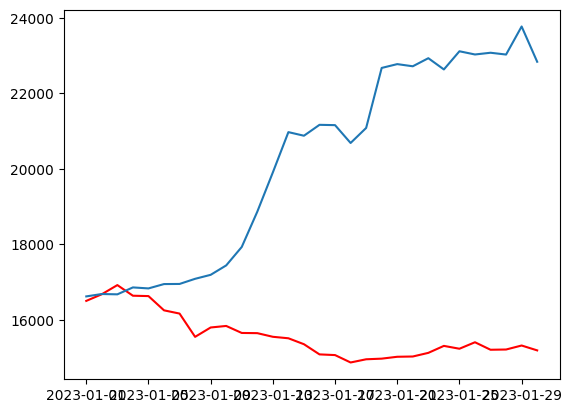

In [9]:
crypto_symbol = 'BTC-USD'  # Symbol dla Bitcoina
data = yf.download(crypto_symbol, start='2023-01-01', end='2023-01-31', interval='1d')
plt.plot(forecast_series, label='Prognoza (30 dni)', color='red')
plt.plot(data['Close'], label='Historyczne dane')
plt.show()